In [7]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from copy import deepcopy
points = np.random.rand(100,2)

In [2]:
def distance(A, B):
    squares = [(a - b) ** 2 for a, b in zip(A, B)]
    return sum(squares) ** 0.5

In [3]:
def updateCentroids(points,centroids,clusters):
    counts = np.zeros(len(centroids))
    for i,c in enumerate(clusters):
        c = int(c)
        if counts[c]==0:
            centroids[c]=points[i]
        else:
            centroids[c]+=points[i]
        counts[c]+=1
    for i in range(len(centroids)):
        if counts[i]:
            centroids[i]/=counts[i]

In [4]:
def assignPoints(points,centroids,clusters):
    change = False
    for i,p in enumerate(points):
        d,j = min([(distance(c,p),loc) for loc,c in enumerate(centroids)])
        if j!=clusters[i]:
            clusters[i]=j
            change = True
    return change

In [5]:
def inertia(points,centroids,clusters):
    value = 0
    for i,p in enumerate(points):
        value+=distance(centroids[int(clusters[i])],p)
    return value

In [6]:
def KMeans(points,k=3):
    clusters = np.zeros(len(points))
    np.random.shuffle(points)
    centroids = deepcopy(points[:k])
    while assignPoints(points,centroids,clusters):
        updateCentroids(points,centroids,clusters)
    plt.scatter([p[0] for p in points],[p[1] for p in points],c=clusters)
    plt.show()
    return inertia(points,centroids,clusters)

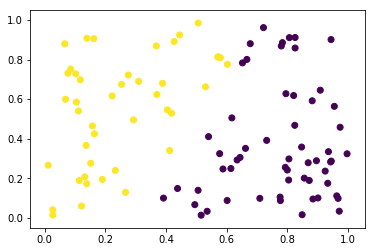

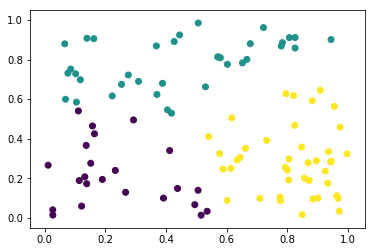

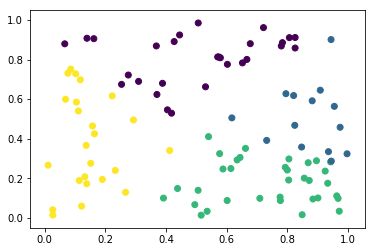

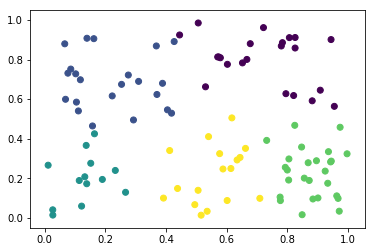

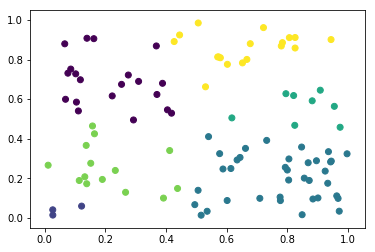

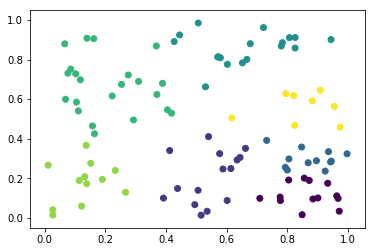

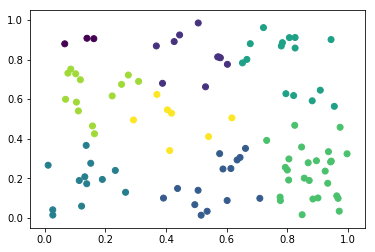

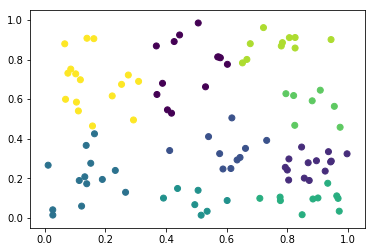

In [7]:
i = [KMeans(points,k) for k in range(2,10)]

In [8]:
i

[29.154225877455325,
 22.212572869387152,
 20.44397180190505,
 15.06995409525098,
 15.512676572647257,
 12.820864827057031,
 12.56363032827749,
 10.714351733848776]

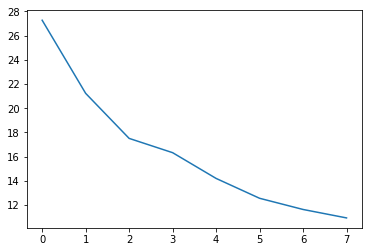

In [9]:
plt.plot(range(8),i)
plt.show()

In [10]:
def KMeans(points,k=3):
    clusters = np.zeros(len(points))
    np.random.shuffle(points)
    centroids = deepcopy(points[:k])
    while assignPoints(points,centroids,clusters):
        updateCentroids(points,centroids,clusters)

In [17]:
%time i = [KMeans(points,k) for k in range(2,10)]

CPU times: user 141 ms, sys: 5.48 ms, total: 147 ms
Wall time: 146 ms


In [18]:
def updateCentroids(points,centroids,clusters):
    for i in range(len(centroids)):
        centroids[i] = np.mean(points[i == clusters])

In [20]:
from scipy.spatial.distance import cdist
def assignPoints(points,centroids,clusters):
    a = cdist(centroids,points)
    b = np.argmin(a, axis=0)
    if np.array_equal(clusters,b):
        return False
    else:
        clusters[:]=b[:]
        return True

In [21]:
%time i = [KMeans(points,k) for k in range(2,10)]

CPU times: user 12.8 ms, sys: 1.57 ms, total: 14.4 ms
Wall time: 12.9 ms
